# POSTTEST 7

### Link :
https://www.kaggle.com/datasets/samuelcortinhas/sports-balls-multiclass-image-classification

### Note :
Class yang digunakan hanya 4 dari 15 class, dikarenakan terlalu banyak class menyebabkan akurasi yang rendah

## Import Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os

## Melakukan Augmentasi Gambar

In [2]:
# Augmentasi data
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 0.45,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

# Normalisasi data val dan test
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

## Split dataset menjadi train,val dan test

#### Ini akan membuat directory untuk train, val, dan test nya

In [3]:
import shutil
from sklearn.model_selection import train_test_split

# Path ke direktori utama yang berisi semua folder kelas
dataset_dir = 'Balls'

# Proporsi pembagian dataset
train_ratio = 0.7  # Proporsi data pelatihan
val_ratio = 0.15  # Proporsi data validasi
test_ratio = 0.15  # Proporsi data pengujian

# Nama-nama folder kelas
class_names = [
    'american_football',
    'baseball',
    'basketball',
    'tennis_ball'
]

# Membagi data untuk setiap kelas
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    
    filenames = os.listdir(class_dir)
    
    train_files, test_val_files = train_test_split(filenames, test_size=(val_ratio + test_ratio), random_state=42)
    val_files, test_files = train_test_split(test_val_files, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)
    
    # Membuat direktori untuk setiap subset
    train_dir = os.path.join(dataset_dir, 'train', class_name)
    val_dir = os.path.join(dataset_dir, 'val', class_name)
    test_dir = os.path.join(dataset_dir, 'test', class_name)
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    # Menyalin gambar ke direktori subset yang sesuai
    for filename in train_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_dir, filename)
        shutil.copy(src, dst)
    
    for filename in val_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_dir, filename)
        shutil.copy(src, dst)
    
    for filename in test_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_dir, filename)
        shutil.copy(src, dst)

## Membuat Flow from Directory

In [4]:
# Direktori untuk setiap subset
train_dir = 'Balls\\test'
val_dir = 'Balls\\val'
test_dir = 'Balls\\test'

# Membuat generator data untuk setiap subset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 303 images belonging to 4 classes.
Found 303 images belonging to 4 classes.
Found 303 images belonging to 4 classes.


## sequential model

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Membuat model Sequential
model = Sequential()

# CNN (Feature Extraction Layer)
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer Flatten
model.add(Flatten())

# DNN (Fully Connected Layer)
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile model
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Melatih model dengan data menggunakan model.fit()
history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 25s 2s/step - loss: 1.4016 - accuracy: 0.2541 - val_loss: 1.3475 - val_accuracy: 0.3036
Epoch 2/10
10/10 [==============================] - 21s 2s/step - loss: 1.2974 - accuracy: 0.3234 - val_loss: 1.2231 - val_accuracy: 0.4653
Epoch 3/10
10/10 [==============================] - 21s 2s/step - loss: 1.2157 - accuracy: 0.4059 - val_loss: 1.1071 - val_accuracy: 0.4653
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 1.1462 - accuracy: 0.5050 - val_loss: 1.0555 - val_accuracy: 0.5545
Epoch 5/10
10/10 [==============================] - 20s 2s/step - loss: 1.0944 - accuracy: 0.5314 - val_loss: 1.0499 - val_accuracy: 0.5611
Epoch 6/10
10/10 [==============================] - 20s 2s/step - loss: 1.0334 - accuracy: 0.5380 - val_loss: 1.0053 - val_accuracy: 0.5941
Epoch 7/10
10/10 [==============================] - 21s 2s/step - loss: 1.0060 - accuracy: 0.5809 - val_loss: 0.9351 - val_accuracy: 0.6172
Epoch 8/10
10/10 [==

## Evaluasi model

In [7]:
# Evaluasi model terhadap data pengujian
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Loss on test data: {test_loss}')
print(f'Accuracy on test data: {test_accuracy}')

10/10 [==============================] - 5s 447ms/step - loss: 0.8436 - accuracy: 0.6799
Loss on test data: 0.84361332654953
Accuracy on test data: 0.6798679828643799


## Grafik metrik (akurasi/error) dan loss terhadap epoch

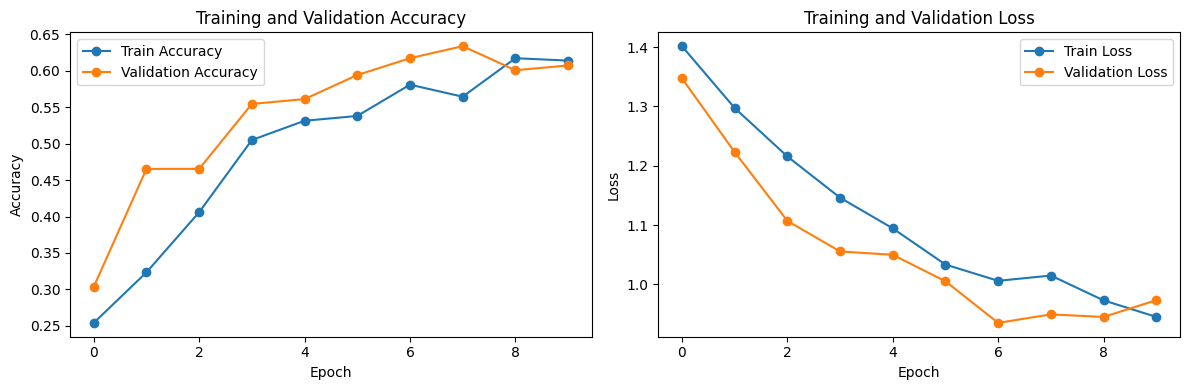

In [8]:
import matplotlib.pyplot as plt

# Dapatkan metrik dari history pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot metrik akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot metrik loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
